## Creating Dataset in Huggingface for training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.8 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from huggingface_hub import login
login()

## Text2Image

https://huggingface.co/docs/diffusers/training/text2image

https://github.com/huggingface/diffusers/blob/main/examples/text_to_image/train_text_to_image.py


In [ ]:
!cd /content/

In [ ]:
!git clone https://github.com/huggingface/diffusers
!pip install  ./diffusers
!pip install .
!pip install -U -r /content/diffusers/examples/text_to_image/requirements.txt

Cloning into 'diffusers'...
remote: Enumerating objects: 59850, done.
remote: Counting objects: 100% (1456/1456), done.
remote: Compressing objects: 100% (687/687), done.
remote: Total 59850 (delta 987), reused 1056 (delta 685), pack-reused 58394
Receiving objects: 100% (59850/59850), 41.35 MiB | 12.83 MiB/s, done.
Resolving deltas: 100% (43353/43353), done.
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.28.0.dev0-py3-none-any.whl size=2035131 sha256=9d8b5eaf2572c0998122b77596c00e37cc34d67cc44898e5f81fbbe576d7ef2e
  Stored in directory: /tmp/pip-ephem-wheel-cache-zy83xs_y/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 6.7 MB/s eta 

In [ ]:
!nvidia-smi

Sun Mar 31 15:40:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0              46W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
!accelerate config default --mixed_precision fp16

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
import os

os.environ['MODEL_NAME']=f"runwayml/stable-diffusion-v1-5"
os.environ['dataset_name']=f"/content/drive/MyDrive/Diffusion_new"
os.environ['output_dir']=f"/content/drive/MyDrive/dog_output"

In [ ]:
!accelerate launch diffusers/examples/text_to_image/train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$dataset_name \
  --use_ema \
  --resolution=768 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=400 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --lr_scheduler="constant" --lr_warmup_steps=0 \
  --output_dir="$output_dir" \
  #--push_to_hub

2024-03-31 17:36:47.534805: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 17:36:47.534860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 17:36:47.536587: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 17:36:48.732004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
03/31/2024 17:36:49 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'variance_type', 'timestep_spacing', 'prediction_type', 'thresholding', '

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

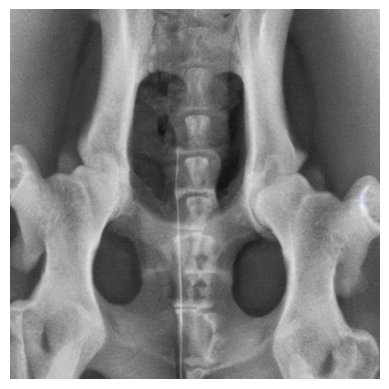

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os

# Set the model path
model_path = "/content/drive/MyDrive/dog_output"

# Load the model
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16, use_safetensors=True)

# Disable safety checker
pipe.safety_checker = None
pipe.requires_safety_checker = False

# Move pipeline to GPU
pipe.to("cuda")

# Generate image
image = pipe(prompt="Centralized Specific view of a canine's hip x-ray, presenting well-defined hip joints",).images[0]

# Save the image
output_dir = "/content/drive/MyDrive/new_generated_img"
os.makedirs(output_dir, exist_ok=True)
image_path = os.path.join(output_dir, "generated_image.png")
image.save(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

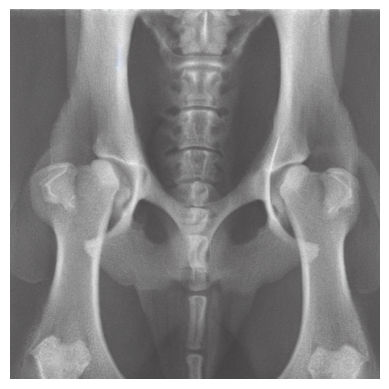

In [ ]:

from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

model_path = "/content/drive/MyDrive/dog_output"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16, use_safetensors=True)
pipe.safety_checker = None
pipe.requires_safety_checker = False
pipe.to("cuda")

# Generate image
image = pipe(prompt="Centralized Specific view of a canine's hip x-ray, presenting well-defined hip joints and accompanied by a date with left angle 117.1 degrees and right angle 86.43 degrees").images[0]

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

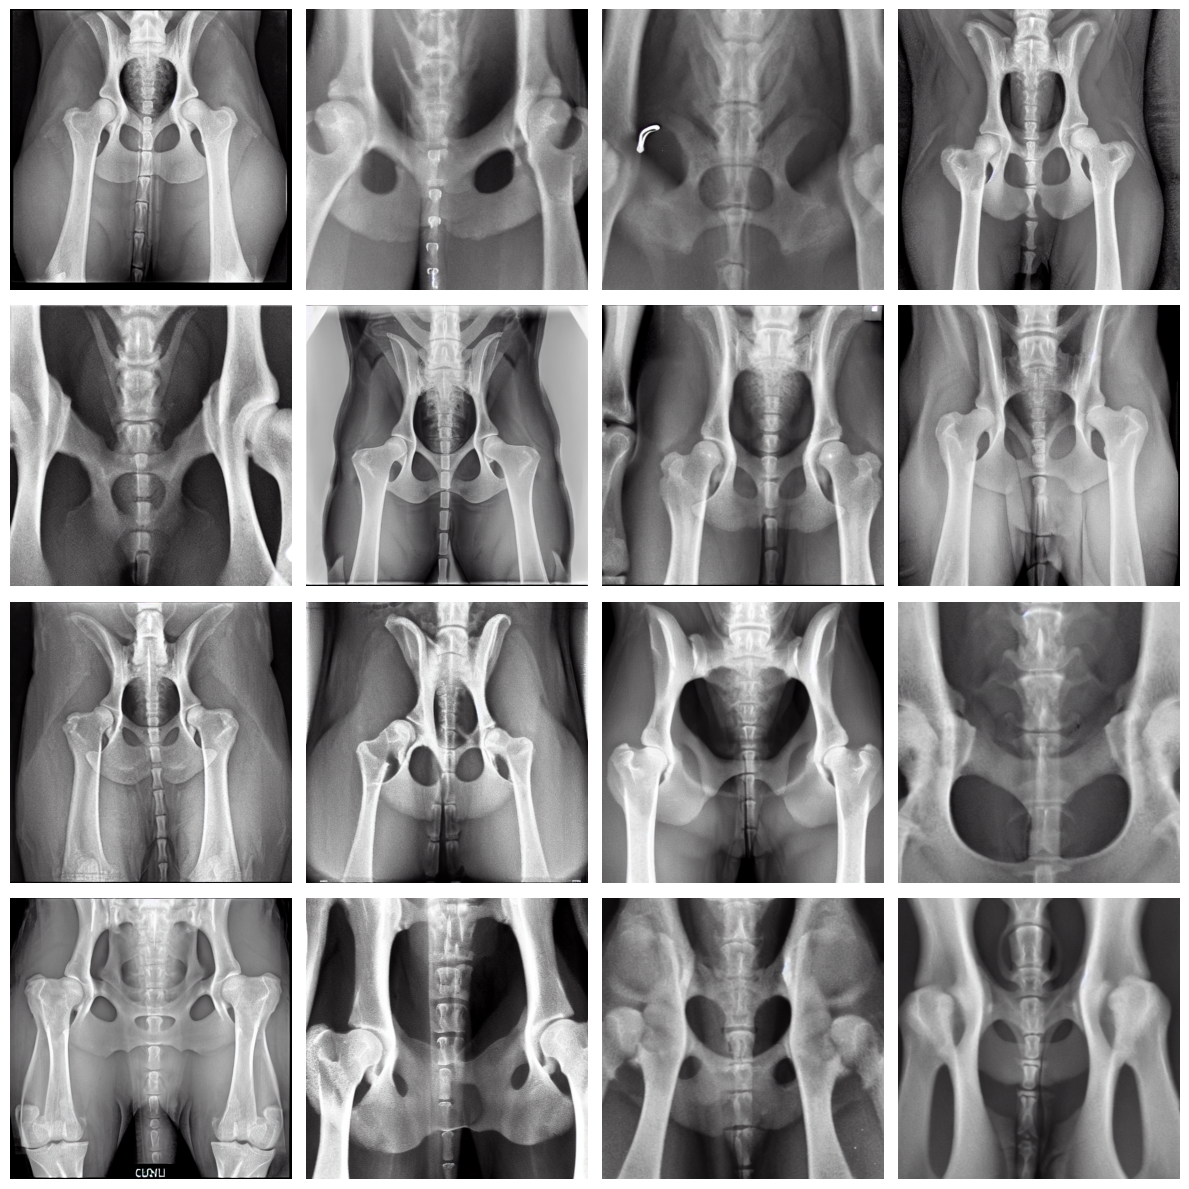

In [ ]:

from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

model_path = "/content/drive/MyDrive/dog_output"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16, use_safetensors=True)
pipe.safety_checker = None
pipe.requires_safety_checker = False
pipe.to("cuda")

# Set the number of rows and columns for the grid
num_rows, num_cols = 4, 4

# Create a subplot with the specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Generate and display images in the grid
for row in range(num_rows):
    for col in range(num_cols):
        # Generate image
        image = pipe(prompt="Zoomout Canine hip joint x-ray image, centered placement, with a date displayed on the top right with left angle 103.83 degrees and right angle 117.92 degrees").images[0]

        # Display the image in the current subplot
        axs[row, col].imshow(image)
        axs[row, col].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot with the grid of images
plt.show()

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import os

model_path = "/content/drive/MyDrive/dog_output"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16, use_safetensors=True)
pipe.safety_checker = None
pipe.requires_safety_checker = False
pipe.to("cuda")

# Set the number of rows and columns for the grid
num_rows, num_cols = 4, 4

# Create a directory to store the generated images
output_dir = "/content/drive/MyDrive/new_generated_img"
os.makedirs(output_dir, exist_ok=True)

# Generate and save images in the grid
for row in range(num_rows):
    for col in range(num_cols):
        # Generate image
        image = pipe(prompt="Zoomout Canine hip joint x-ray image, centered placement, with a date displayed on the top right with left angle 103.83 degrees and right angle 117.92 degrees").images[0]

        # Define the filename
        filename = f"generated_image_{row}_{col}.png"

        # Save the image
        image.save(os.path.join(output_dir, filename))

# Print confirmation message
print(f"Generated images saved to {output_dir}")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Generated images saved to /content/drive/MyDrive/new_generated_img
